# Auto Regression Model (AR)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
df = pd.read_csv('CSVs/uspopulation.csv',index_col='DATE',parse_dates=True)

In [4]:
df.index.freq = 'MS'

In [5]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<Axes: xlabel='DATE'>

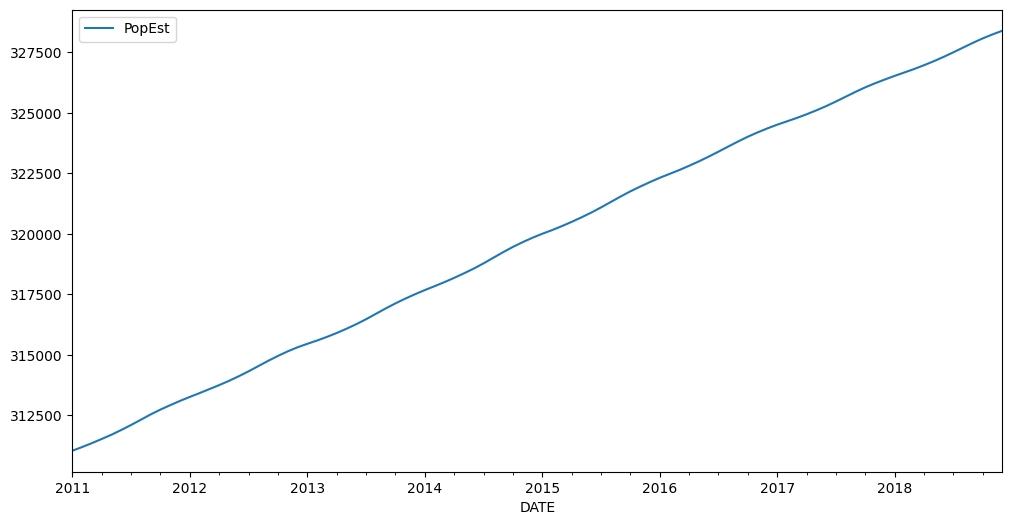

In [7]:
df.plot(figsize=(12,6)) #as their is a linear trend so AR model is OK to use 

In [8]:
len(df)

96

In [9]:
#96 moths in the data set 
96-12

84

In [10]:
train = df.iloc[:84] #84 months of data for training 
test = df.iloc[84:] #12 months of data for testing 


In [12]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train['PopEst'], lags=1)  

In [14]:
AR1fit = model.fit()

In [15]:
AR1fit.aic

767.6378091856507

In [17]:
AR1fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [18]:
start = len(train)
end = len(train) + len(test) - 1 #-1 for the end point is not included in python

In [19]:
start,end

(84, 95)

In [20]:
AR1fit.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [21]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [22]:
pred1 = AR1fit.predict(start=start,end=end)

In [24]:
pred1 = pred1.rename('AR(1) Predictions')

In [25]:
pred1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

<Axes: xlabel='DATE'>

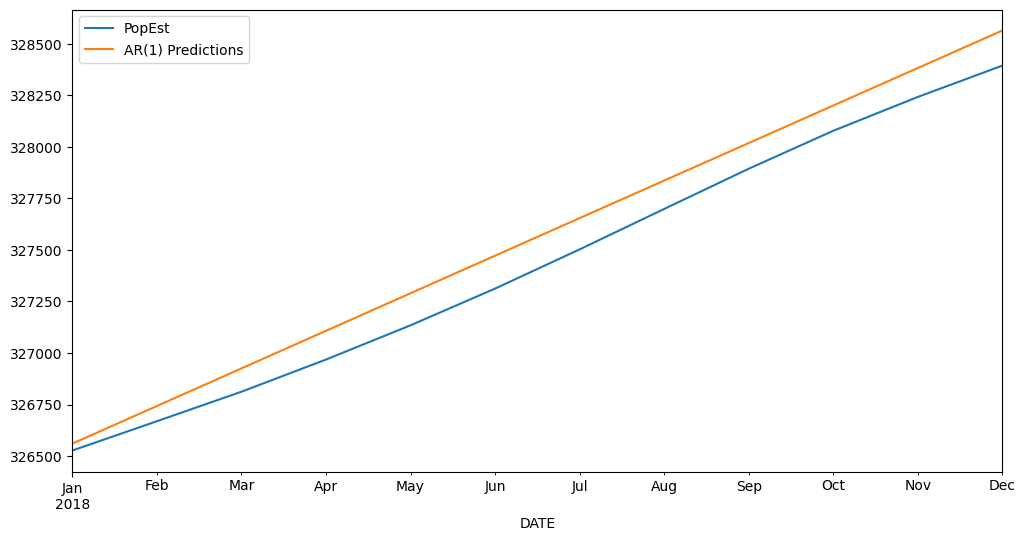

In [ ]:
test.plot(figsize=(12,6),legend=True)
pred1.plot(legend=True)
# by taking 1 lag we got this plot 

In [30]:
# for 2 lags
AR2fit = AutoReg(train['PopEst'], lags=2).fit()
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [31]:
AR2fit = AR2fit.predict(start=start,end=end)

In [32]:
pred2 = AR2fit.rename('AR(2) Predictions')

<Axes: xlabel='DATE'>

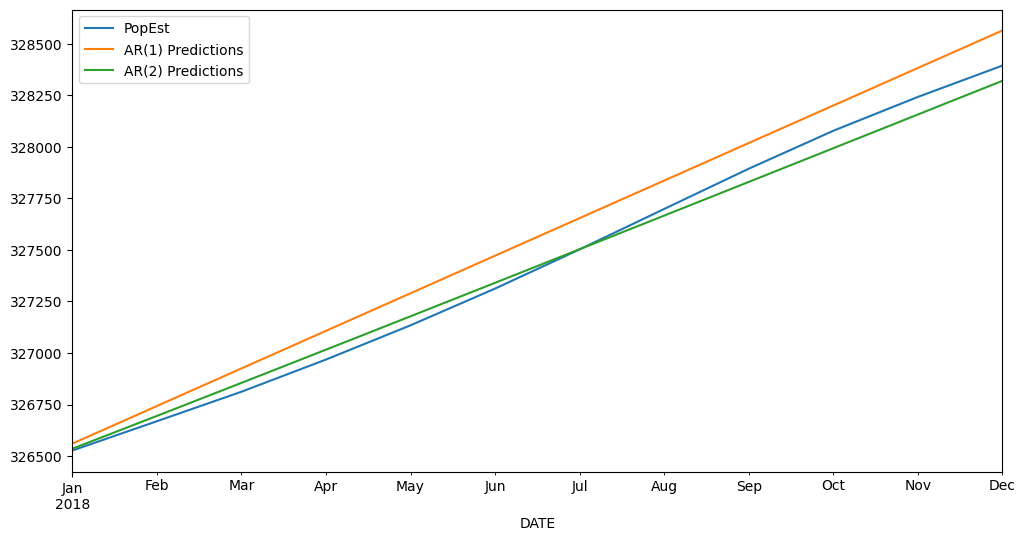

In [ ]:
test.plot(figsize=(12,6),legend=True)
pred1.plot(legend=True)
pred2.plot(legend=True)
#plot after 2 lags 

In [41]:

from statsmodels.tsa.ar_model import AutoReg

ARfit = AutoReg(train['PopEst'], lags=8).fit()




In [43]:
ARfit.params

const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64

In [44]:
pred8 = ARfit.predict(start=start,end=end)

pred8 = pred8.rename('AR(8) Predictions')



In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
labels = ['AR1','AR2','AR8']

In [47]:
preds = [pred1,pred2,pred8]

In [48]:
for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} Error: {error}')

AR1 Error: 17449.71423587912
AR2 Error: 2713.258667805521
AR8 Error: 186.972186531862


<Axes: xlabel='DATE'>

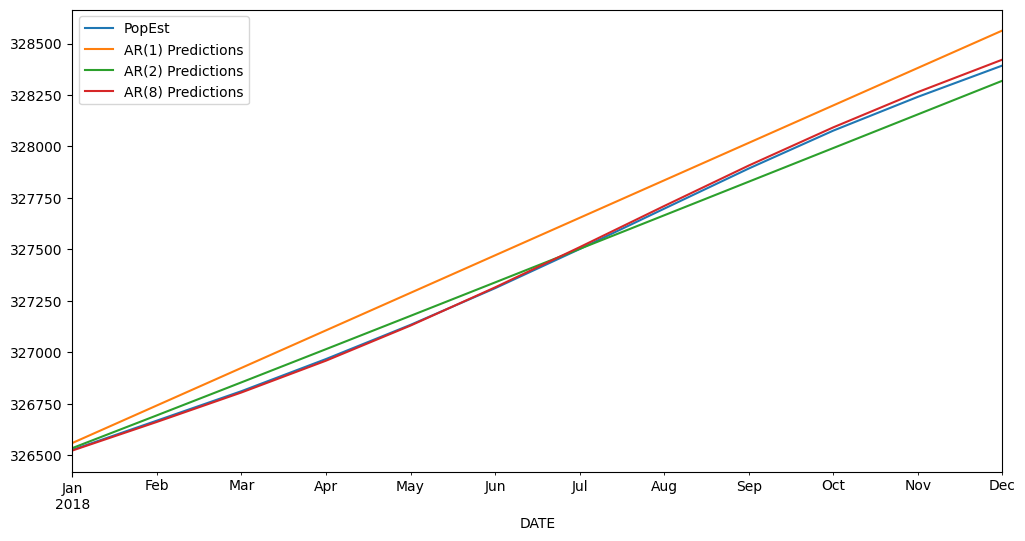

In [51]:
test.plot(figsize=(12,6),legend=True)
pred1.plot(legend=True)
pred2.plot(legend=True)
pred8.plot(legend=True)
# so just by going 8 months back we can predict the future accurately

# forecasting the future

In [56]:
from statsmodels.tsa.ar_model import AutoReg

# Fit model (choose appropriate lag, e.g., 2)
model = AutoReg(df['PopEst'], lags=8)
ARfit = model.fit()

# Forecast 12 future time points
forecasted_values = ARfit.predict(
    start=len(df),
    end=len(df) + 18 - 1,  # End is inclusive
    dynamic=False
).rename('Forecast')


<Axes: xlabel='DATE'>

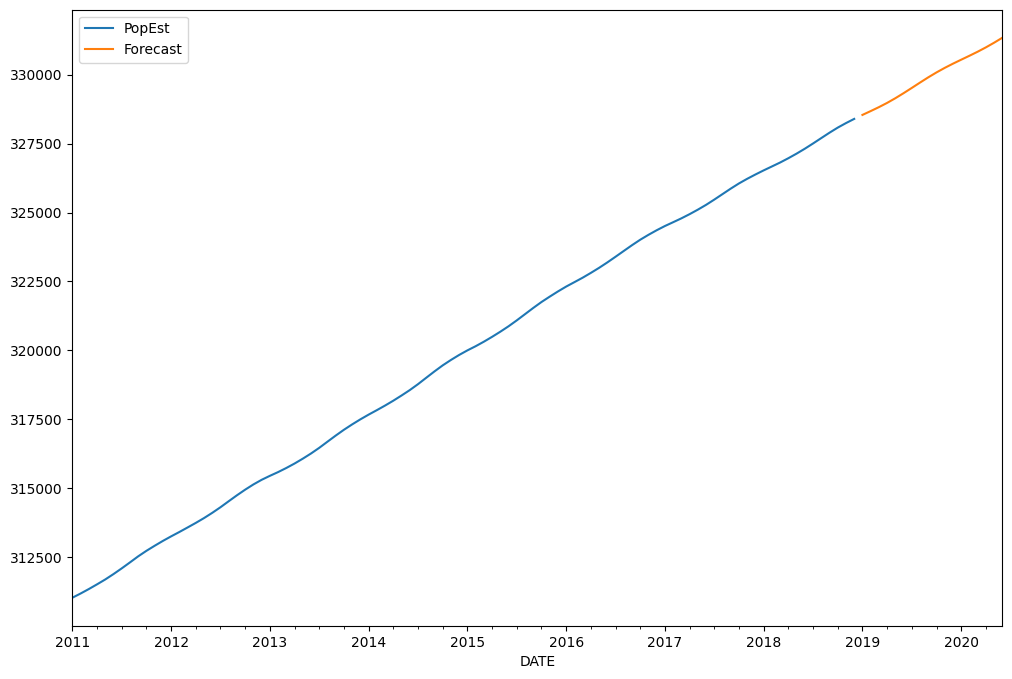

In [57]:
df['PopEst'].plot(figsize=(12,8),legend=True)
forecasted_values.plot(legend=True)

# Descriptive Statistics and Tests

In [58]:
df1 = pd.read_csv('CSVs/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'
df2 = pd.read_csv('CSVs/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [59]:
from statsmodels.tsa.stattools import adfuller

In [60]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [61]:
help(adfuller)


Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

In [62]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4],index = ['ADF Test Statistic','p-value','Lags Used','Number of Observations'])

In [63]:
for key, value in dftest[4].items():
    dfout[f'Critical Value ({key})'] = value

dfout


ADF Test Statistic          0.815369
p-value                     0.991880
Lags Used                  13.000000
Number of Observations    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64

# FUNCTION TO CREATE AUGMENTED Dickey fuller test rather then remembering p avlues 

In [68]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [69]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


<Axes: xlabel='Month'>

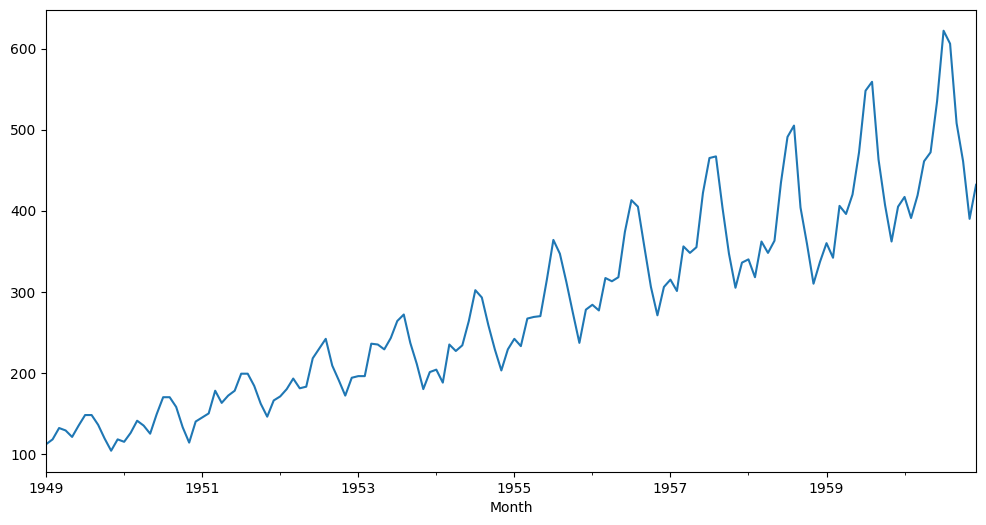

In [70]:
df1['Thousands of Passengers'].plot(figsize=(12,6))

<Axes: xlabel='Date'>

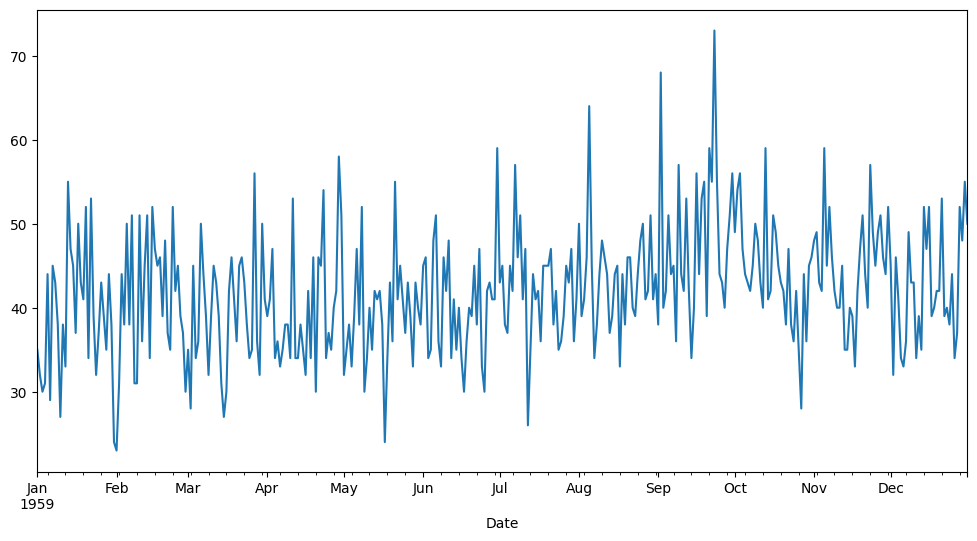

In [71]:
df2['Births'].plot(figsize=(12,6))

In [72]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [73]:
df3 = pd.read_csv('CSVs/samples.csv',index_col=0,parse_dates=True)
df3.index.freq = 'MS'

In [74]:
df3

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
...,...,...,...,...
1959-08-01,49,73,9338,58
1959-09-01,41,77,9502,38
1959-10-01,64,70,9667,42
1959-11-01,37,87,9833,62


<Axes: >

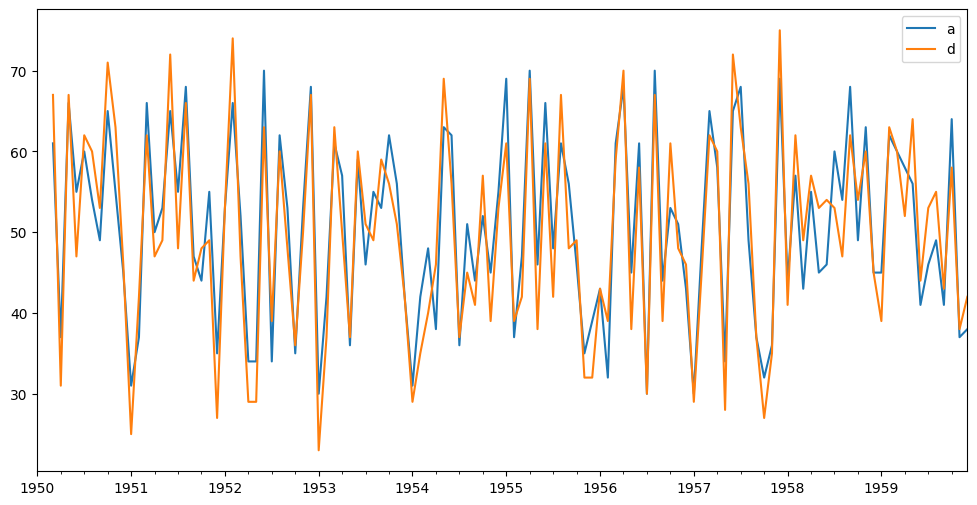

In [78]:
df3['a'].iloc[2:].plot(figsize=(12,6),legend=True)
df3['d'].shift(2).plot(figsize=(12,6),legend=True)


In [79]:
from statsmodels.tsa.stattools import grangercausalitytests 

In [80]:
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [81]:
grangercausalitytests(df3[['b','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [83]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])

In [84]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


<Axes: >

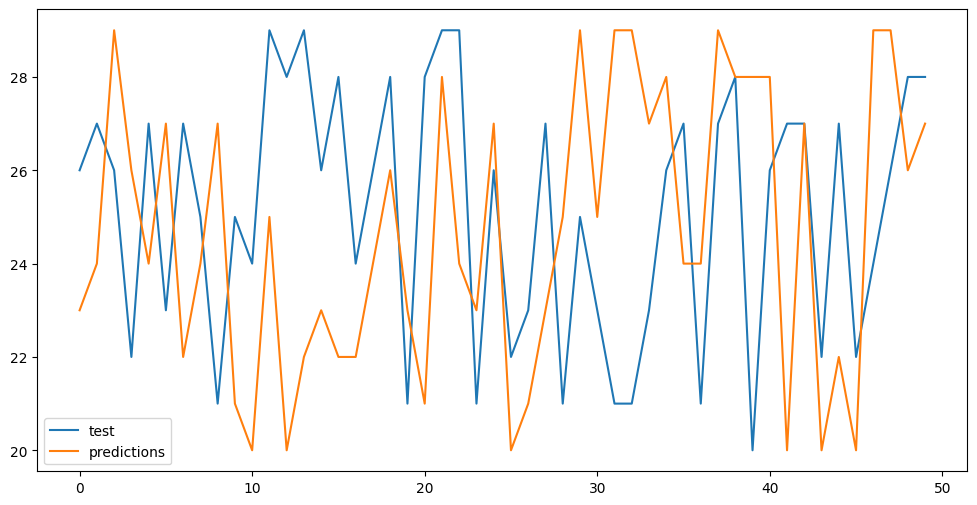

In [85]:
df.plot(figsize=(12,6))

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_squared_error(df['test'],df['predictions'])

mean_absolute_error(df['test'],df['predictions'])

3.54

In [88]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [90]:
mse(df['test'],df['predictions'])



17.02

In [91]:
rmse(df['test'],df['predictions'])

4.125530268947253

In [92]:
meanabs(df['test'],df['predictions'])

3.54

In [93]:
df = pd.read_csv('CSVs/airline_passengers.csv',index_col='Month',parse_dates=True)

In [94]:
df.index.freq = 'MS'

In [96]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot



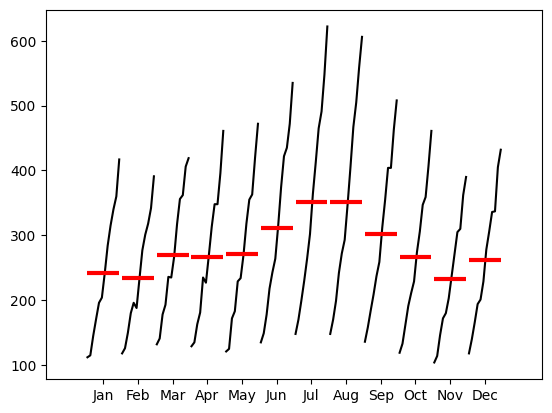

In [97]:
month_plot(df['Thousands of Passengers']);

In [ ]:
quarter_plot(df['Thousands of Passengers']);

ValueError: Expected frequency Q. Got MS

In [99]:
dfq = df["Thousands of Passengers"].resample(rule='Q').mean()

C:\Users\aryan.katoch\AppData\Local\Temp\ipykernel_20708\1043789993.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dfq = df["Thousands of Passengers"].resample(rule='Q').mean()


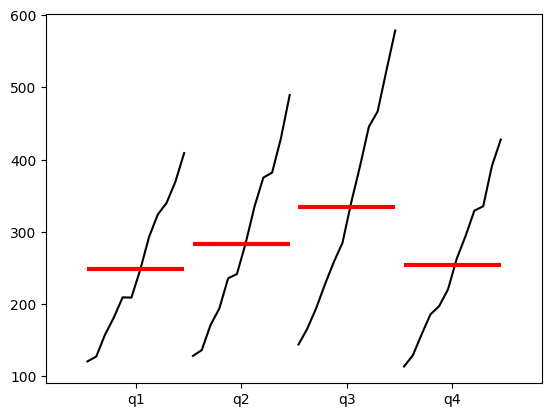

In [100]:
quarter_plot(dfq);

# Pyramid ARIMA models to choose the best values for arima model 

In [101]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [102]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [ ]:
stepwise_fit =auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True);
# sking auto_arima() to automatically search for the best (p, d, q) values for your ARIMA model using AIC (Akaike Information Criterion) to measure model quality.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.038, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.01 sec 

ARIMA(0,1,0) → These are the main ARIMA parameters:

p=0 → no autoregressive (AR) terms

d=1 → first-order differencing (i.e., using changes instead of raw values)

q=0 → no moving average (MA) terms

(0,0,0)[0] → Seasonal components:

You set seasonal=False, so these are dummy seasonal values. Ignore them.

intercept → The model includes a constant/intercept term.

AIC=2650.760 → Akaike Information Criterion. Lower AIC is better.

Time=0.01 sec → Time taken to fit this model.

In [105]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Fri, 02 May 2025   AIC                           2459.074
Time:                        15:59:41   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'],start_p=0,start_q=0,max_p=4,max_q=4,seasonal=True, trace=True,m=12);

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.39 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.22 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.13 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.25 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.08 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [107]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 02 May 2025   AIC                           1019.178
Time:                                     16:17:16   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""